## Index
- Importing the necessary libraries
- Going through the directory and loading the file and reading it
- Info about the data
- Plot to see closing price along with time
- Plot to see Sales volume of stock along with Date
- EDA to see Moving average for different time frame 10,20,50
- Plot Moving average 10,20,50 with the actual price
- Daily return of the stock on average
- Plot Average Daily return using histogram
- Prediction Model
  - LSTM model to see Prediction of stock with closing price
  - Plot graph for prediction and actual value for closing price
  - Error loss using Adam optimiser and RMSE
  - LSTM model to see Prediction of Volume along with time
  - Plot graph to see actual vs predicted volume
  - Error loss using adam optimiser and RMSE

In [40]:
import pandas as pd
import os



In [6]:
os.chdir('/Assignment')

In [7]:
os.listdir()

['stock_data.csv']

In [8]:
# Load the dataset
file_path = 'stock_data.csv'
stock_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
stock_data.head(), stock_data.info(), stock_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1092 non-null   object 
 1   Open       1092 non-null   float64
 2   High       1092 non-null   float64
 3   Low        1092 non-null   float64
 4   Close      1092 non-null   float64
 5   Adj Close  1092 non-null   float64
 6   Volume     1092 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 59.8+ KB


(       Date       Open       High        Low      Close  Adj Close    Volume
 0  1/2/2020  59.687500  59.977501  59.180000  59.977501  59.741245  23753600
 1  1/3/2020  58.775002  59.457500  58.525002  59.017502  58.785023  20538400
 2  1/6/2020  58.080002  59.317501  57.817501  59.264999  59.031548  26263600
 3  1/7/2020  59.549999  60.442501  59.097500  59.982498  59.746220  31485600
 4  1/8/2020  59.939999  60.509998  59.537498  60.095001  59.858280  27710800,
 None,
               Open         High          Low        Close    Adj Close  \
 count  1092.000000  1092.000000  1092.000000  1092.000000  1092.000000   
 mean    254.334991   259.101096   249.356678   254.482093   254.270355   
 std     190.789638   194.100961   186.902226   190.612159   190.685090   
 min      50.025002    52.485001    45.169998    49.099998    48.935833   
 25%     132.953754   134.927505   130.639996   133.048748   132.740437   
 50%     187.599998   191.900002   183.885002   187.995003   187.759239   

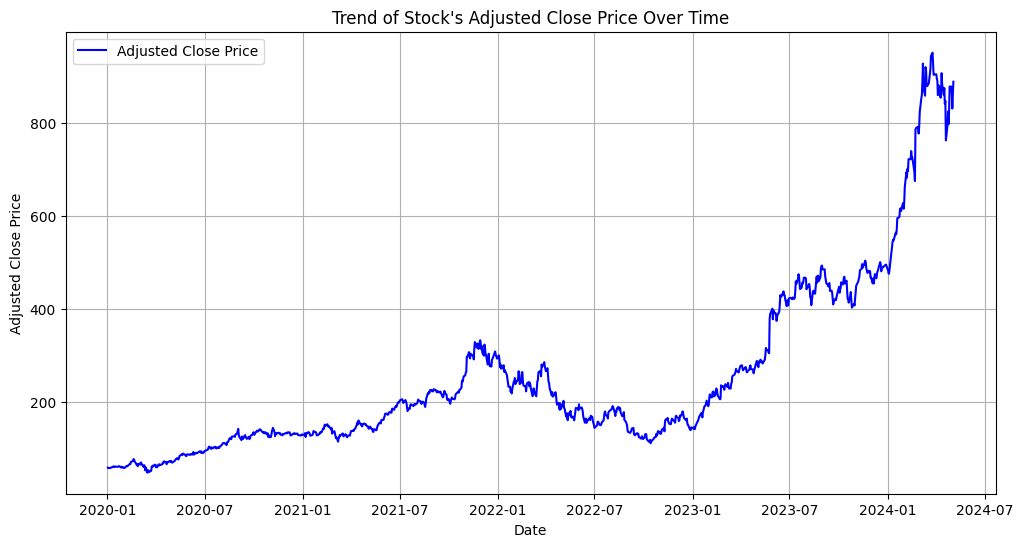

In [9]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

"""


"""

# Plotting the Adjusted Close Price over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.title('Trend of Stock\'s Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')

<Figure size 1500x1000 with 0 Axes>

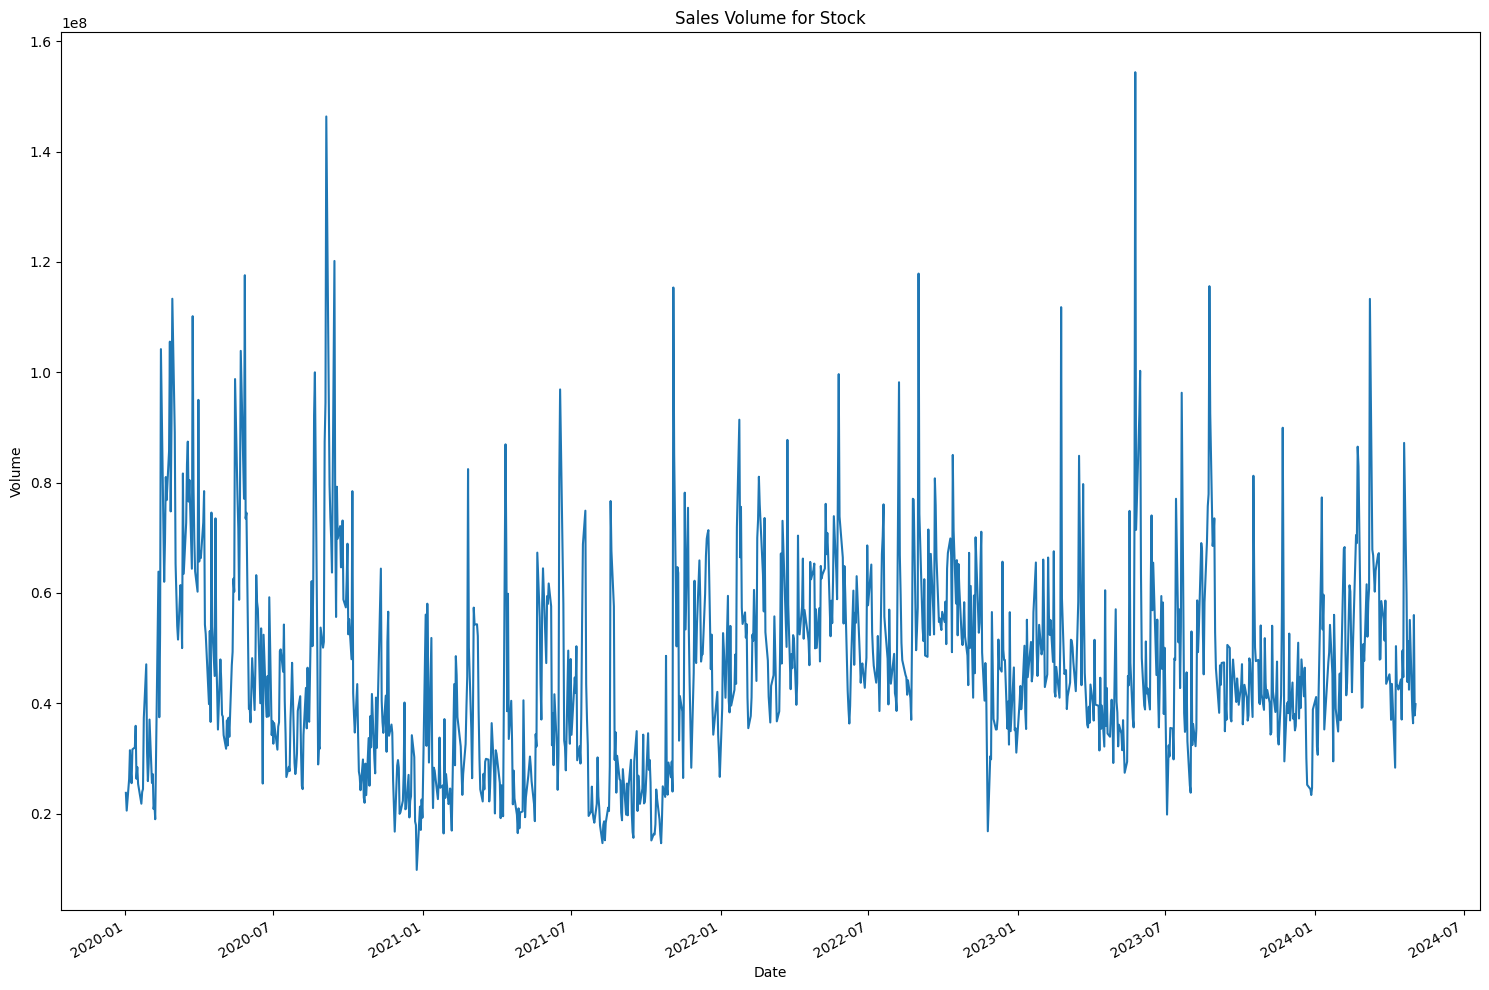

In [22]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))


stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Set 'Date' as the index
stock_data.set_index('Date', inplace=True)

# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
stock_data['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title("Sales Volume for Stock")
plt.tight_layout()
plt.show()

## 2 What was the moving average of the  stock?
- The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [13]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [23]:
ma_day = [10, 20, 50]

for ma in ma_day:


  column_name = f"MA for {ma} days"
  stock_data[column_name] = stock_data['Adj Close'].rolling(ma).mean()


Text(0.5, 1.0, 'Stock Data')

<Figure size 1500x1000 with 0 Axes>

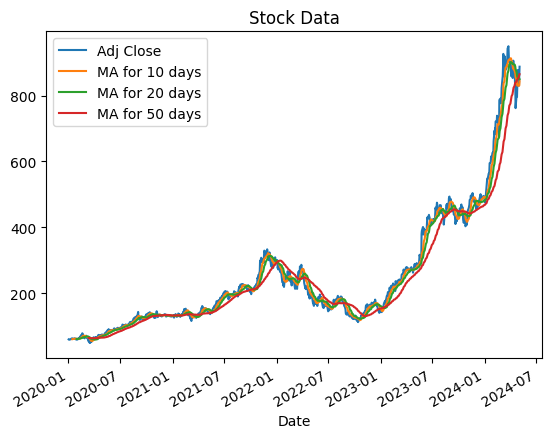

In [24]:
plt.figure(figsize=(15, 10))

stock_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot().set_title('Stock Data')

### 3. What was the daily return of the stock on average?
- Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the  stock.

Text(0.5, 1.0, 'Stock Data')

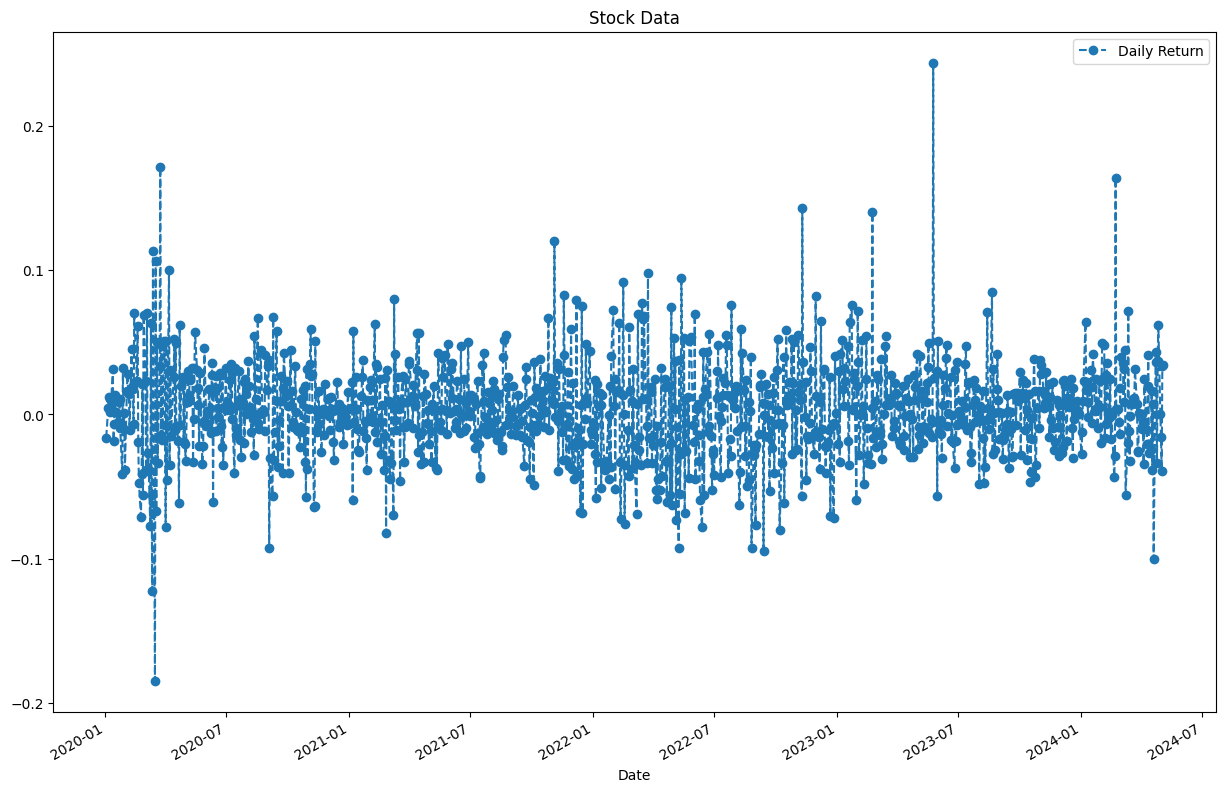

In [25]:

plt.figure(figsize=(15, 10))
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()

# Then we'll plot the daily return percentage


stock_data['Daily Return'].plot(legend=True, linestyle='--', marker='o').set_title('Stock Data')




- Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

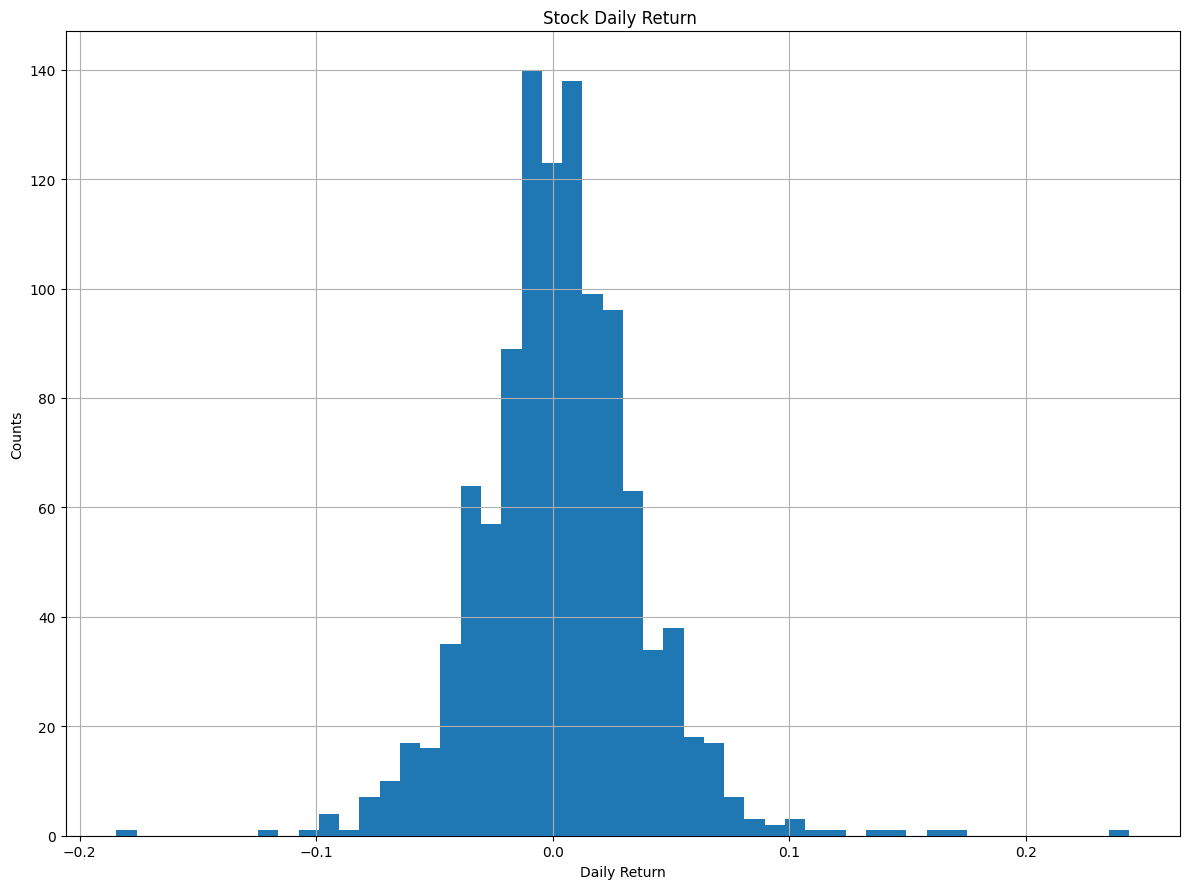

In [26]:
plt.figure(figsize=(12, 9))


stock_data['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(f'Stock Daily Return ')

plt.tight_layout()

In [ ]:
tech_rets =stock_data['Adj Close']

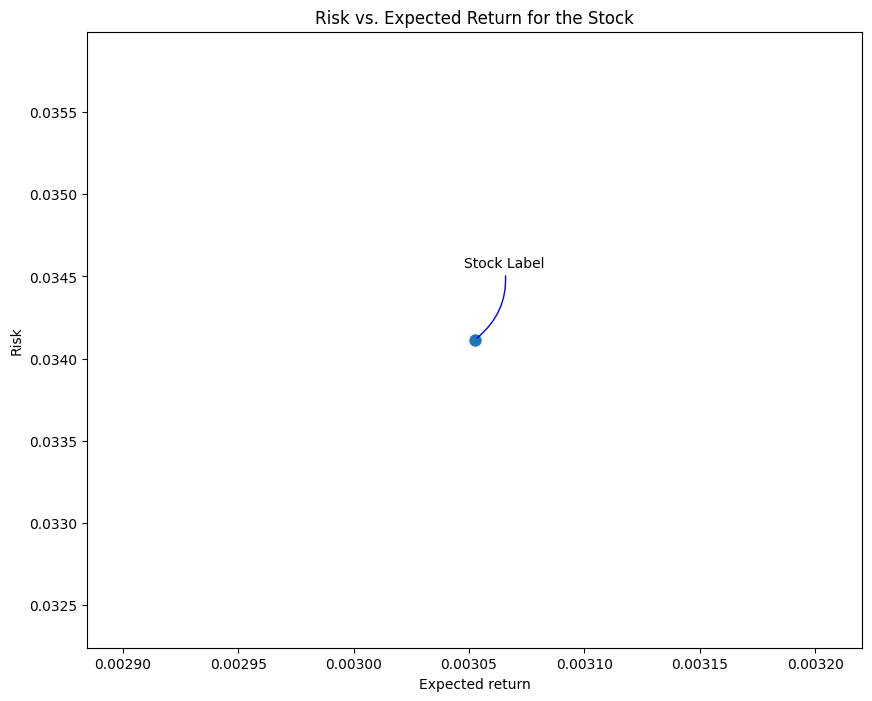

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Calculate daily returns of the stock
rets = stock_data['Adj Close'].pct_change().dropna()

# Area for scatter plot marker
area = np.pi * 20

# Set up the plot
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Risk vs. Expected Return for the Stock')

# Annotate the single stock point
plt.annotate('Stock Label',
             xy=(rets.mean(), rets.std()),
             xytext=(50, 50),
             textcoords='offset points',
             ha='right',
             va='bottom',
             arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()


###  Predicting the closing price stock price of stock:

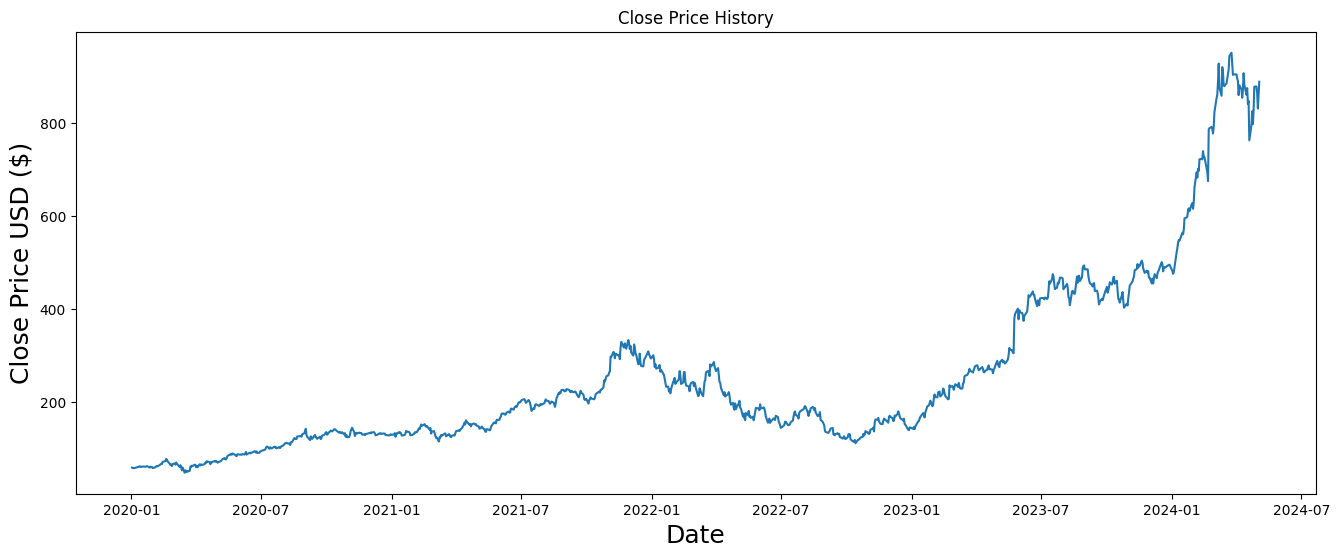

In [28]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(stock_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [29]:
# Create a new dataframe with only the 'Close column
data = stock_data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1038

In [30]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01207377],
       [0.0110082 ],
       [0.01128291],
       ...,
       [0.86723567],
       [0.89804862],
       [0.93097056]])

In [31]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01207377, 0.0110082 , 0.01128291, 0.01207932, 0.01220419,
       0.01293678, 0.01329752, 0.01542312, 0.0141189 , 0.01364439,
       0.01457677, 0.01467389, 0.01430205, 0.01490421, 0.01566732,
       0.01500688, 0.01215424, 0.01431037, 0.01363606, 0.01371099,
       0.01110809, 0.01219032, 0.01407728, 0.01508458, 0.01605304,
       0.0153149 , 0.01847278, 0.01983806, 0.02112841, 0.02064001,
       0.02591518, 0.02779659, 0.03282756, 0.03116259, 0.02710285,
       0.02133375, 0.01821749, 0.01977146, 0.01559517, 0.02044299,
       0.02220785, 0.01928307, 0.02445001, 0.02133653, 0.01932469,
       0.01360831, 0.01794832, 0.01389413, 0.00552491, 0.01233184,
       0.        , 0.0057913 , 0.00178152, 0.00459808, 0.00259457,
       0.00452038, 0.01464614, 0.01365826, 0.01688274, 0.01563124])]
[0.0191998181927672]

[array([0.01207377, 0.0110082 , 0.01128291, 0.01207932, 0.01220419,
       0.01293678, 0.01329752, 0.01542312, 0.0141189 , 0.01364439,
       0.01457677, 0.01467389, 0.014

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

978/978 [==============================] - 62s 58ms/step - loss: 0.0012


In [33]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 28ms/step


49.619254792546606

<ipython-input-35-ff87decb762e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


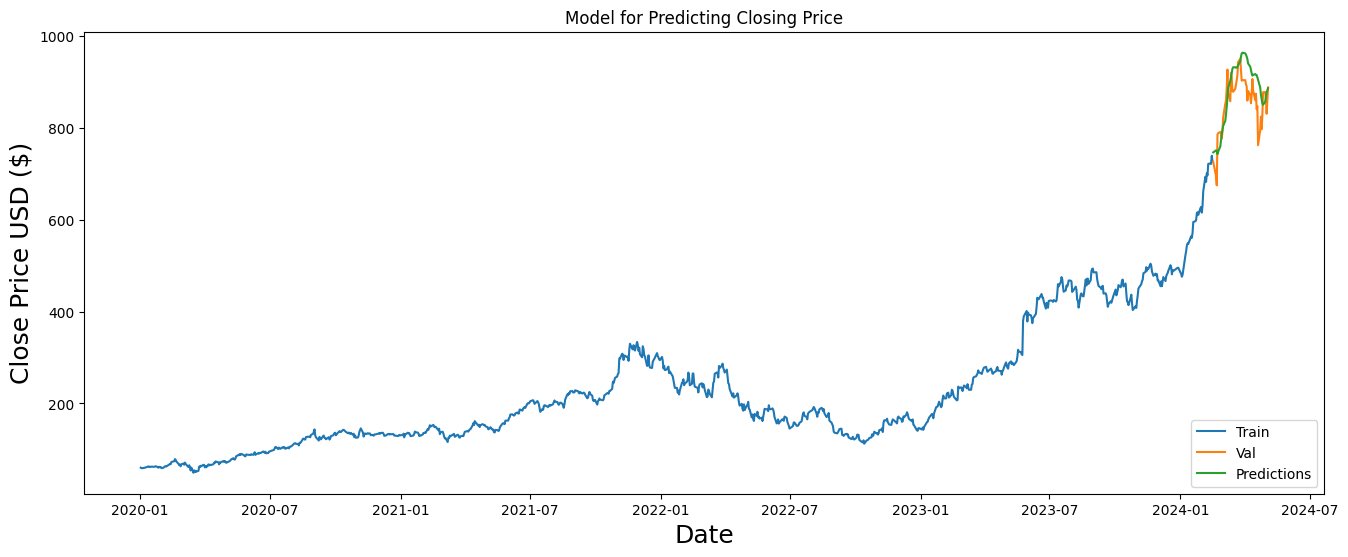

In [35]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model for Predicting Closing Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### Model for predicting closign volume

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Create a new dataframe with only the 'Volume' column
data = stock_data.filter(['Volume'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * 0.95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)



In [37]:


# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to fit the model input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



In [38]:


# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)






978/978 [==============================] - 60s 57ms/step - loss: 0.0120


2/2 [==============================] - 1s 30ms/step


<ipython-input-39-0e43b8e5b120>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


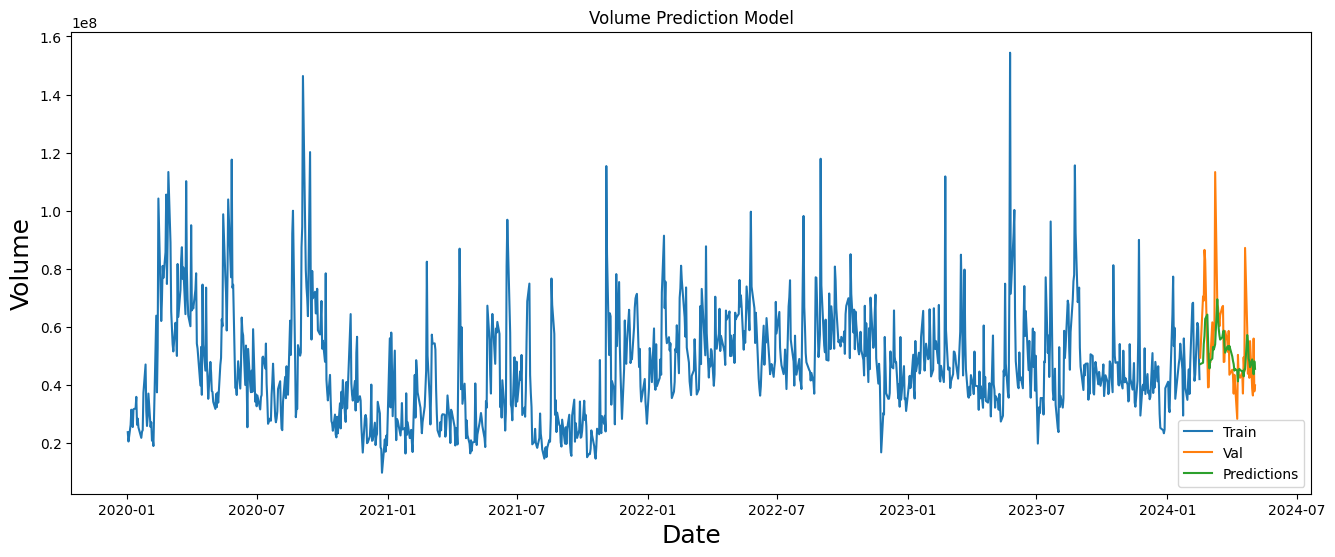

In [39]:

# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array and reshape it
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted volume values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Volume Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.plot(train['Volume'])
plt.plot(valid[['Volume', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
